**Sentiment Analysis of Code Mixed Telugu To English with Unsupervised Data Normalisation**

In [1]:
pip install symspellpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 10.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for editdistpy: filename=editdistpy-0.1.4-cp310-cp310-linux_x86_64.whl size=187492 sha256=5ea021ad0ea813947e8d6b1fa7b074528670fc72615ac9c40a132a98d809aed4
  Stored in directory: /root/.cache/pip/wheels/4c/0f/10/c20d67cd765ee5b3666d759a307241bba0663135d6ee1c0072
Successfully built editdistpy


In [2]:
import pkg_resources #for working with files
from symspellpy import SymSpell, Verbosity  #spelling correction
import re #regular expression
# '''The "re" module stands for "regular expressions," and it provides functions for working with regular expressions in Python.
#  Regular expressions are powerful tools for pattern matching and text manipulation. You can use the "re" module to search strings,
# replace substrings, and perform various other operations based on patterns defined by regular expressions.'''


In [3]:
#r'(.)\1+', r'\1'
#The r before the string ensures it's a raw string for regular expressions.
#(.) creates a capturing group that matches any single character.
#\1+ matches one or more occurrences of the same character captured in the first group.

In [4]:
def elongation_normalization(text):
  text = text.lower()
  text = re.sub(r'(.)\1{2,}', r"\1\1", text)
  return text
example = "hellooo bagundhiiiiiii, gooood"
elongation_normalization(example)


'helloo bagundhii, good'

In [5]:
#SymSpell is a Python library designed to perform efficient spelling correction and fuzzy string matching.



**The Maximum edit distance determines how many edits (insertions, deletions, substitutions, or transpositions) are allowed to transform one word into another during the spelling correction process.**
         **Frequency dictionary from packages : Defines the path to the dictionary file. This file likely contains a list of words along with their frequencies in the English language.**

In [6]:
#SymSpell is a Python library designed to perform efficient spelling correction and fuzzy string matching.
#Frequency dictionary from packages : Defines the path to the dictionary file. This file likely contains a list of words
# along with their frequencies in the English language
 # Segmentation : This method segments the input text into words and performs spelling correction on each word based on the loaded dictionary.

sym_spell = SymSpell(max_dictionary_edit_distance=4)
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
def eng_spelling_correction(text):
  result = sym_spell.word_segmentation(text)
  return result.corrected_string
example = "thsi isa a lovely movei"
eng_spelling_correction(example)

'this is a lovely movie'

In [7]:

# Normalising Double consonants and long vowels
def transliteration_normalization(text):
  text = re.sub(r'(.)\1{1,}', r"\1", text)
  return text
example = "tinnaavaa sarigga"
transliteration_normalization(example)

'tinava sariga'

In [8]:
# To normalise Aspirated Consonents (like which requires burst of breath to pronounce)
def consonant_normalization(text):

  text = text.replace('kh', 'k')
  text = text.replace('chh', 'ch')
  text = text.replace('gh', 'g')
  text = text.replace('th', 't')
  text = text.replace('jh', 'j')
  text = text.replace('dh', 'd')
  text = text.replace('bh', 'b')
  return text
example = "thinnava jharkand"
consonant_normalization(example)

'tinnava jarkand'

In [9]:
# Data_normalization takes a single argument text_tuple, which is  a list of tuples containing words and their associated languages.
# Data_normalization function performs normalization on a list of mixed-language text, applying
# specific normalization techniques based on the language of each word.
def data_normalization(text_tuple):
  text = ""
  for tupl in text_tuple:
    word = tupl[0]
    lang = tupl[1]
    word = elongation_normalization(word)
    # for both languages
    if lang == 'en': #english words
      word = eng_spelling_correction(word)
      text += word + " "
    if lang == 'te': # telugu words
      word = transliteration_normalization(word)
      word = consonant_normalization(word)
      text += word + " "
    if lang == 'univ': # universal
      text += word + " "
  return text
example = [('worstttt', 'en'), ('government', 'en'), ('.', 'univ'), ('#YSRCP', 'univ'),
     ('chala', 'te'), ('chethha', 'te'), ('ga', 'te'), ('paripalana', 'te'), ('chesthumdhi', 'te'), ('.', 'univ')]
data_normalization(example)

'worst government . #ysrcp chala cheta ga paripalana chestumdi . '

In [10]:
import numpy as np
import pandas as pd

In [11]:

data = pd.read_csv('/content/34k_Code_Mixed_Tel-Eng.csv')
# data.label = data.label.map({'NEG':0, 'POS':2,'NTL':1})
data

,comment,label,Unnamed: 2
0,2 5 5 routine revenge story engaging screen pl...,-1,NaN
1,attlakada mana pani manam chedam inka force ok...,0,NaN
2,1 time watch entra movie good,1,NaN
3,covid time lo choose vaalu like esesukondi,0,NaN
4,puneethraj70 ya character wise rgv chala bette...,1,NaN
...,...,...,...
34583,annayya media tech processor gurinchi oka vide...,0,NaN
34584,theme music boyavani vetuki song,0,NaN
34585,brother online jobs emanna untaya,0,NaN
34586,acting radhu kani short film kavala prema niku,-1,NaN


In [12]:
data.shape

(34588, 3)

In [13]:
num_rows = len(data)

# Print the number of rows
print("Number of rows:", num_rows)

Number of rows: 34588


In [14]:
# Assuming `data` is your DataFrame and 'label' is the column containing the labels
# Replace the labels -1, 0, 1 with 0, 1, 2 respectively
data['label'] = data['label'].replace({-1: 0, 0: 1, 1: 2})

# Verify the changes
print(data['label'].unique())

[0 1 2]


In [15]:
column_name_to_delete = 'Unnamed: 2'
data.drop(columns=[column_name_to_delete], inplace=True)

In [16]:
# Get the list of column names
columns = data.columns

# Print the list of column names
print(columns)

Index(['comment', 'label'], dtype='object')


In [17]:
# NLTK is a powerful library for natural language processing tasks in Python.
# it imports NLTK and downloads the stopwords corpus, which contains common words (e.g., "the", "is", "and")
#  that are often removed from text during preprocessing to focus on more meaningful words.
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# the stopwords corpus, which contains common words (e.g., "the", "is", "and")
#  that are often removed from text during preprocessing to focus on more meaningful words.
stop_words = set(stopwords.words('english'))
#print(stop_words)
# removing words like no,not,didn`t..etc from stop words
black_list = set(word for word in stop_words if 'no' in word or "'t" in word)
print(black_list)
stop_words = stop_words - black_list

{"won't", "didn't", "weren't", "doesn't", "aren't", "mightn't", "shouldn't", "isn't", "mustn't", "don't", 'not', "couldn't", "wouldn't", 'no', "needn't", "hasn't", "wasn't", 'now', "haven't", "shan't", 'nor', "hadn't"}


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(tf.__version__)
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.random.set_seed(0)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, SimpleRNN
from tensorflow.keras.layers import LSTM, Bidirectional

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from sklearn import metrics

2.15.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
vocab_size = 5000
embedding_dim = 300
max_len = 25

batch_size=128
epochs=30

tokenizer = Tokenizer(num_words=vocab_size, oov_token="", lower=True)
binarizer = LabelBinarizer()

In [21]:

data.fillna('', inplace=True)
labels = data.label.tolist()
sentences = data.comment.tolist()
_= tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences) # This line converts the text sentences into sequences of numbers using the fitted tokenizer.
# Each word in the sentences is replaced by its corresponding index in the tokenizer's word index
print(sequences[0])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_len)
x_train, x_test, y_train, y_test = train_test_split(
    padded_sequences, labels, stratify=labels, test_size=0.2, random_state=101)

y_train_true = y_train.copy()
y_test_true = y_test.copy()

y_train = binarizer.fit_transform(y_train)
print(x_train[0])
y_test = binarizer.fit_transform(y_test)

[83, 213, 213, 917, 3367, 65, 1, 395, 434, 669, 1]
[  1   1   1 537   1   1 651 368   1   1   1   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]


In [22]:
def simple_rnn():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(SimpleRNN(512, return_sequences=True))

    model.add(SimpleRNN(256))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

In [23]:
# Plot history:
def plot_history(history):
    plt.figure()
    plt.plot(history.history['loss'], label='training data')
    plt.plot(history.history['val_loss'], label='validation data')
    plt.title('LOSS')
    plt.ylabel('Loss')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")

    # Plot history: Acc
    plt.figure()
    plt.plot(history.history['accuracy'], label='training data')
    plt.plot(history.history['val_accuracy'], label='validation data')
    plt.title('ACCURACY')
    plt.ylabel('Accuracy')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.show()


def evaluate_model(trained_model, y_test_true):
    y_test_preds = trained_model.predict(x_test)
    y_test_preds = np.argmax(y_test_preds, axis=1)

    print(metrics.classification_report(y_test_true, y_test_preds))

    cm = metrics.confusion_matrix(y_test_true, y_test_preds, normalize='true')
    sns.heatmap(cm, annot=True, cbar=None, cmap='viridis')
    plt.show()
    f1 = metrics.f1_score(y_test_true, y_test_preds, average='macro')
    return f1

Epoch 1/30
217/217 [==============================] - 52s 197ms/step - loss: 0.7800 - accuracy: 0.6648 - val_loss: 0.5916 - val_accuracy: 0.7705
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/217 [==============================] - 17s 80ms/step - loss: 0.5139 - accuracy: 0.8070 - val_loss: 0.5561 - val_accuracy: 0.7892
Epoch 3/30
217/217 [==============================] - 14s 65ms/step - loss: 0.4212 - accuracy: 0.8454 - val_loss: 0.5690 - val_accuracy: 0.7923
Epoch 4/30
217/217 [==============================] - 13s 60ms/step - loss: 0.3535 - accuracy: 0.8716 - val_loss: 0.6168 - val_accuracy: 0.7791
Epoch 5/30
217/217 [==============================] - 18s 84ms/step - loss: 0.2857 - accuracy: 0.8995 - val_loss: 0.6738 - val_accuracy: 0.7759


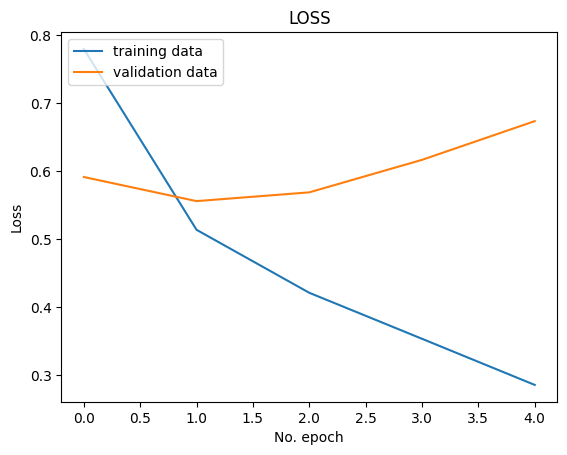

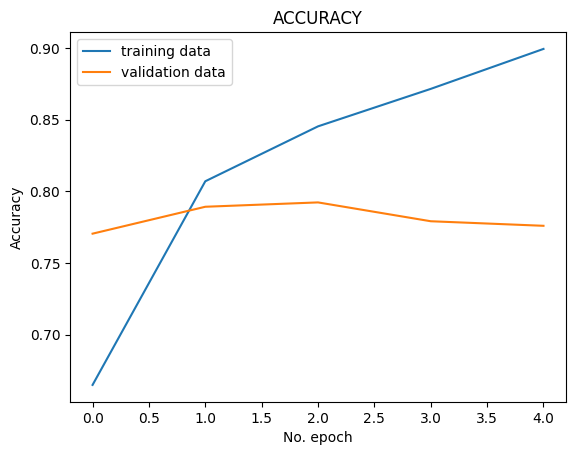

217/217 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      2517
           1       0.77      0.74      0.75      2189
           2       0.78      0.81      0.79      2212

    accuracy                           0.78      6918
   macro avg       0.78      0.78      0.78      6918
weighted avg       0.78      0.78      0.78      6918



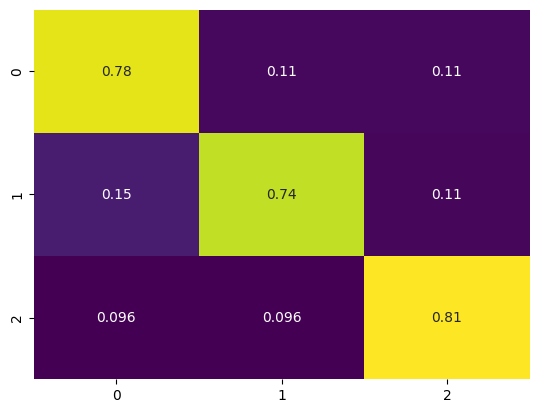

f1 score 0.7754236396728954


In [24]:
rnn_model = simple_rnn()
checkpoint_path="simple_rnn_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = rnn_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)
plot_history(history)
f1 = evaluate_model(rnn_model, y_test_true)
print("f1 score", f1)

In [25]:
sentence = "vadu manchi director em kaadu, oka hit kuda leduu"

# Convert the single sentence into a list with one element
single_sentence_list = [sentence]

# Convert the sentence into sequences of integers
single_sentence_sequence = tokenizer.texts_to_sequences(single_sentence_list)

# Pad the sequence to ensure fixed length
padded_single_sequence = pad_sequences(single_sentence_sequence, padding='post', maxlen=max_len)
print(padded_single_sequence)

[[ 130   33  254   29 2166   17  179   12    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


Epoch 1/30
217/217 [==============================] - 18s 66ms/step - loss: 0.9252 - accuracy: 0.5319 - val_loss: 0.6969 - val_accuracy: 0.7115
Epoch 2/30
  2/217 [..............................] - ETA: 21s - loss: 0.6477 - accuracy: 0.7461

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/217 [==============================] - 6s 26ms/step - loss: 0.6289 - accuracy: 0.7528 - val_loss: 0.6193 - val_accuracy: 0.7530
Epoch 3/30
217/217 [==============================] - 3s 15ms/step - loss: 0.5389 - accuracy: 0.7967 - val_loss: 0.5360 - val_accuracy: 0.7978
Epoch 4/30
217/217 [==============================] - 3s 12ms/step - loss: 0.4532 - accuracy: 0.8326 - val_loss: 0.5356 - val_accuracy: 0.7989
Epoch 5/30
217/217 [==============================] - 3s 14ms/step - loss: 0.4102 - accuracy: 0.8515 - val_loss: 0.5292 - val_accuracy: 0.7997
Epoch 6/30
217/217 [==============================] - 3s 16ms/step - loss: 0.3848 - accuracy: 0.8621 - val_loss: 0.5579 - val_accuracy: 0.8002
Epoch 7/30
217/217 [==============================] - 2s 10ms/step - loss: 0.3644 - accuracy: 0.8719 - val_loss: 0.5692 - val_accuracy: 0.7939
Epoch 8/30
217/217 [==============================] - 2s 11ms/step - loss: 0.3487 - accuracy: 0.8785 - val_loss: 0.5825 - val_accuracy: 0.7869


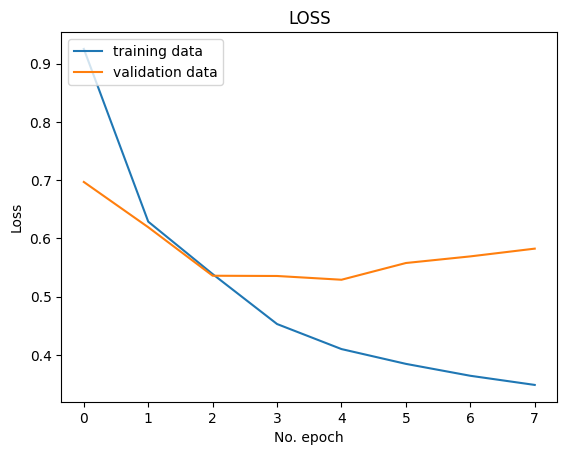

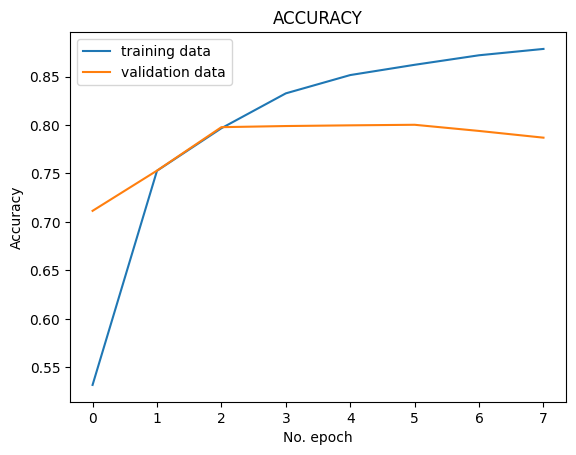

217/217 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      2517
           1       0.74      0.79      0.76      2189
           2       0.80      0.81      0.81      2212

    accuracy                           0.79      6918
   macro avg       0.79      0.79      0.79      6918
weighted avg       0.79      0.79      0.79      6918



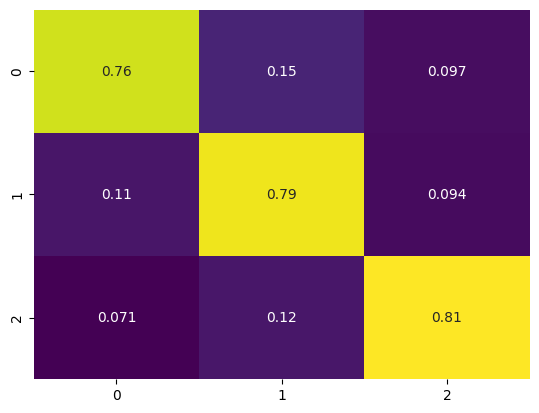

f1 score 0.7869907242905857


In [26]:
# code for lstm implentation of above one
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
vocab_size = 5000
embedding_dim = 300
max_len = 25

def lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim = vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(128))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model
lstm_model = lstm_model()
checkpoint_path="lstm_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = lstm_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)
plot_history(history)
f1 = evaluate_model(lstm_model, y_test_true)
print("f1 score", f1)


In [27]:
def bi_lstm():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(512, return_sequences=True)))
    model.add(Bidirectional(LSTM(256)))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

Epoch 1/30
217/217 [==============================] - 29s 99ms/step - loss: 0.8306 - accuracy: 0.6158 - val_loss: 0.5709 - val_accuracy: 0.7800
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/217 [==============================] - 13s 59ms/step - loss: 0.4995 - accuracy: 0.8110 - val_loss: 0.5216 - val_accuracy: 0.7991
Epoch 3/30
217/217 [==============================] - 11s 53ms/step - loss: 0.4318 - accuracy: 0.8420 - val_loss: 0.5265 - val_accuracy: 0.8012
Epoch 4/30
217/217 [==============================] - 11s 53ms/step - loss: 0.4003 - accuracy: 0.8529 - val_loss: 0.5492 - val_accuracy: 0.7955
Epoch 5/30
217/217 [==============================] - 11s 52ms/step - loss: 0.3729 - accuracy: 0.8658 - val_loss: 0.5385 - val_accuracy: 0.8018


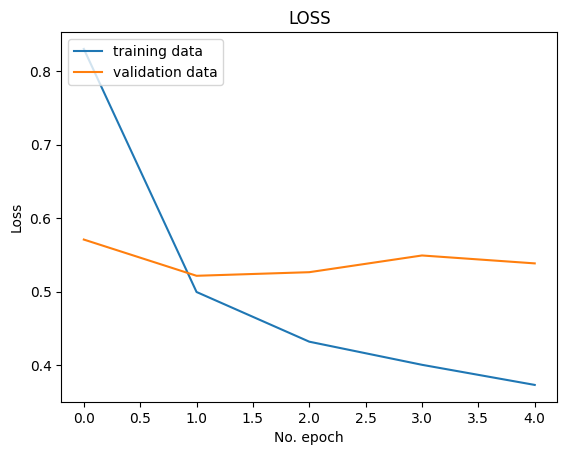

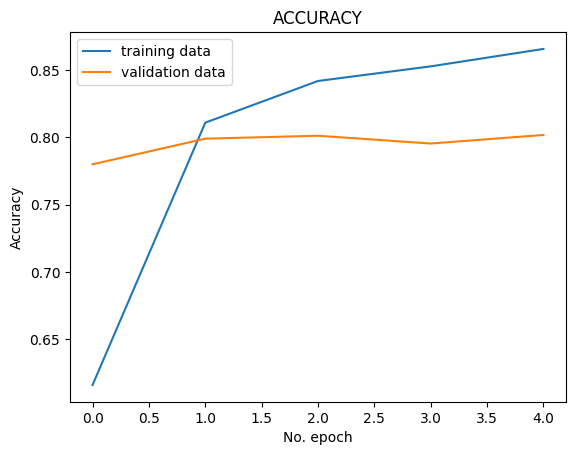

217/217 [==============================] - 3s 7ms/step
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2517
           1       0.79      0.76      0.78      2189
           2       0.84      0.80      0.82      2212

    accuracy                           0.80      6918
   macro avg       0.80      0.80      0.80      6918
weighted avg       0.80      0.80      0.80      6918



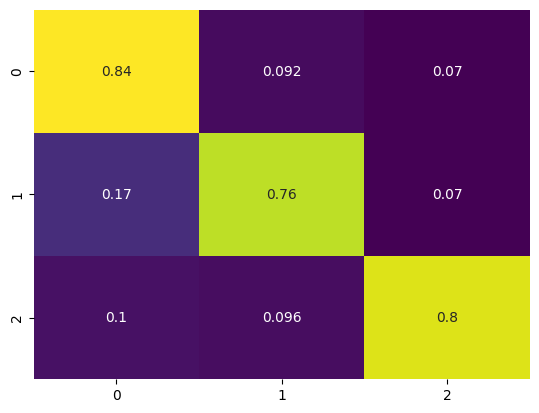

f1 score 0.801378699353395


In [28]:
bi_lstm_model = bi_lstm()
checkpoint_path="bi_lstm_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = bi_lstm_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
f1 = evaluate_model(bi_lstm_model, y_test_true)
print("f1 score", f1)